In [1]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
from IPython.display import Image as ImageDisp
from pandas import DataFrame
import string
import os
import glob
import matplotlib.pyplot as plt
import matplotlib

0.045 0.015
0.045 0.015


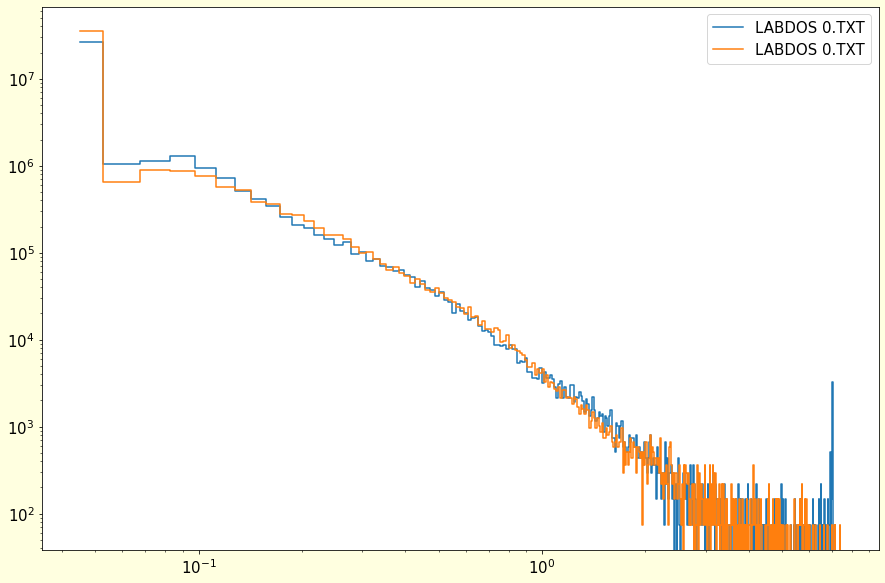

In [211]:
plt.figure(figsize=(15,10), facecolor='lightyellow')
matplotlib.rcParams.update({'font.size': 15})

fto = '/storage/experiments/2023/09_labdos_italy/labdos_B8_230905_0933.txt' #  File to Open
fto = '/storage/experiments/2023/10_labdos_tests/D9/0.TXT' #  Uranove sklo
fto = '/storage/experiments/2023/10_labdos_tests/EF/hangar_oprava/0.TXT'
fto = '/storage/experiments/2023/10_labdos_tests/EF/hangar_oprava/Hangar_ALpaska/2.TXT'
fto = '/storage/experiments/2023/11_labdos_tests/porovnani_2611/LABDOS_20231126_014406.log'
fto = '/storage/experiments/2023/12_USA_LABDOS/flight/LABDOS01A/0.TXT' # Slegl USA

l=[]
l.extend(range(0,506))
df = pd.read_csv(fto, sep=',', header=None, names=l, comment='*', low_memory=False)#,engine='python' )
df = df.reset_index(drop=True)
#sn1 = df.loc[df[0]=='$DOS'].iloc[0,5]
#print("S.N.: ", sn1)
df = df.loc[df[0]=='$HIST']

FIRST_CHANNEL = 8

rcc = df

ener = rcc.iloc[:,FIRST_CHANNEL:500].sum()

coef2 = np.array([0.,0.])
coef2[1] = 0.015
coef2[0] = 0.015*3

print (coef2[0], coef2[1])

e1 = pd.DataFrame()
e1['1'] = ener
e1['i'] = ener.index
e1['x'] = (e1['i'].astype(float)-FIRST_CHANNEL) * coef2[1] + coef2[0]

plt.plot(e1['x'], e1['1'] * 1.1/ coef2[1], label='LABDOS '+fto.split('/')[-1], drawstyle='steps-mid')

fto = '/storage/experiments/2023/09_labdos_italy/labdos_EF_230905_0934.txt' #  File to Open
fto = '/storage/experiments/2023/10_labdos_tests/EF/0.TXT' #  Uranove sklo
fto = '/storage/experiments/2023/11_labdos_tests/porovnani_2611/LABDOS_20231126_014748.log'
fto = '/storage/experiments/2023/11_labdos_tests/1_25V_fixed_reference/LABDOS_20231126_143234.log'
fto = '/storage/experiments/2023/12_USA_LABDOS/flight/LABDOS01B/0.TXT' # Slegl USA

l=[]
l.extend(range(0,520))
df = pd.read_csv(fto, sep=',', header=None, names=l, comment='*', low_memory=False)#,engine='python' )
df = df.reset_index(drop=True)
#sn1 = df.loc[df[0]=='$DOS'].iloc[0,5]
#print("S.N.: ", sn1)
df = df.loc[df[0]=='$HIST']

FIRST_CHANNEL = 8

rcc = df

ener = rcc.iloc[:,FIRST_CHANNEL:500].sum()

coef2 = np.array([0.,0.])
coef2[1] = 0.015
coef2[0] = 0.015*3

print (coef2[0], coef2[1])

e2 = pd.DataFrame()
e2['1'] = ener
e2['i'] = ener.index
e2['x'] = (e2['i'].astype(float)-FIRST_CHANNEL) * coef2[1] + coef2[0]

plt.plot(e2['x'], e2['1'] * 1.1/ coef2[1], label='LABDOS '+fto.split('/')[-1], drawstyle='steps-mid')

plt.yscale('log')
plt.xscale('log')
plt.legend()

/storage/experiments/2023/10_labdos_tests/EF/hangar_oprava/Hangar_ALpaska/1.TXT
/storage/experiments/2023/10_labdos_tests/EF/hangar_oprava/Hangar_ALpaska/0.TXT
/storage/experiments/2023/10_labdos_tests/EF/hangar_oprava/Hangar_ALpaska/2.TXT


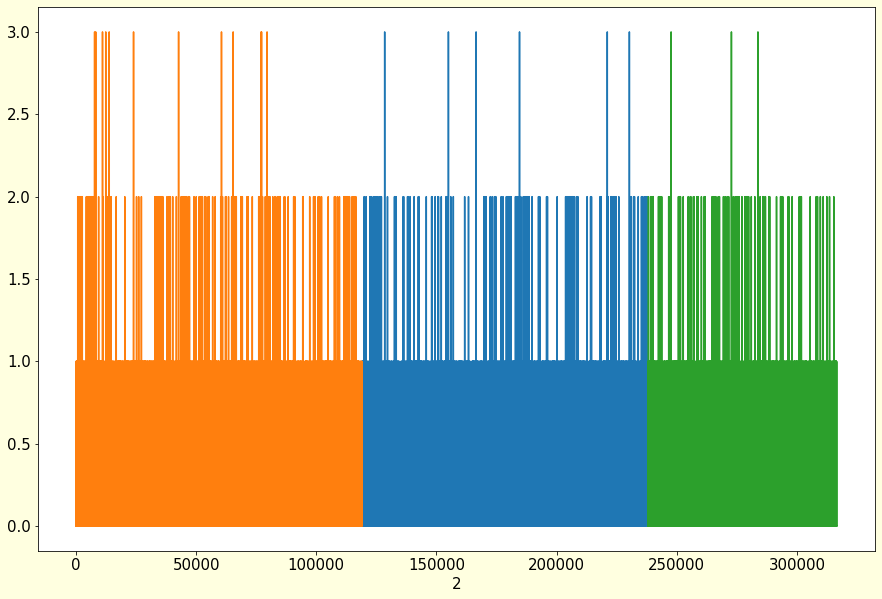

In [140]:
plt.figure(figsize=(15,10), facecolor='lightyellow')
matplotlib.rcParams.update({'font.size': 15})

dto = '/storage/experiments/2023/10_labdos_tests/EF/hangar_oprava/'
dto = '/storage/experiments/2023/10_labdos_tests/EF/hangar_oprava/Hangar_ALpaska/'
fto = ['1.TXT', '0.TXT', '2.TXT']

for f in fto:
    ff = dto+f
    print(ff)
    l=[]
    l.extend(range(0,505))
    df = pd.read_csv(ff, sep=',', header=None, names=l, comment='*', low_memory=False)#,engine='python' )
    df = df.reset_index(drop=True)
    #sn1 = df.loc[df[0]=='$DOS'].iloc[0,5]
    #print("S.N.: ", sn1)
    df = df.loc[df[0]=='$HIST']

    FIRST_CHANNEL = 9

    rcc = df

    rcc[2] = rcc[2].astype(float)
    rcc.set_index(2, inplace=True)
    rcc[FIRST_CHANNEL].astype(float).plot()    

#plt.yscale('log')
#plt.xscale('log')
#plt.legend()



<AxesSubplot:xlabel='2'>

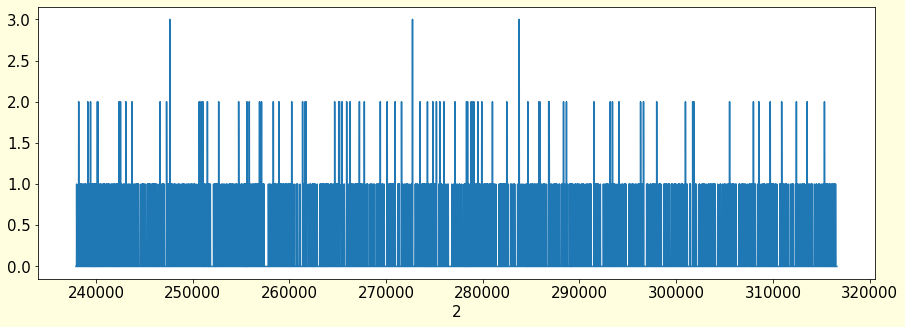

In [123]:
plt.figure(figsize=(15,5), facecolor='lightyellow')
rcc[9].loc[rcc[7]>1000].plot()

In [24]:
df

,0,1,2,3,4,5,6,7,8,9,...,496,497,498,499,500,501,502,503,504,505
7,1700959460,$HIST,0,12.74,21244.0,2,689,17721,6426.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,1700959471,$HIST,1,23.26,21279.0,1,701,17917,6181.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,1700959481,$HIST,2,33.77,21254.0,3,810,17949,6063.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10,1700959492,$HIST,3,44.28,21305.0,1,908,18201,5666.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11,1700959502,$HIST,4,54.79,21310.0,0,783,18202,5787.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3061,1700991564,$HIST,3054,32114.58,20681.0,2,2024,16958,6405.0,12.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3062,1700991574,$HIST,3055,32125.9,20694.0,6,1942,16968,6461.0,12.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3063,1700991585,$HIST,3056,32135.60,20646.0,3,1950,16751,6725.0,8.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3064,1700991595,$HIST,3057,32146.11,20602.0,1,1932,16525,7009.0,14.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### LABDOS 7E, 87
(136 keV +-35 keV) + CH * 71 keV
mean energy of the last channel in saturation: 14.36 MeV +-35 keV

### LABDOS 90
(60 keV +-15 keV) + CH * 30 keV
mean energy of the last channel in saturation: cca 8.8 MeV 


In [2]:
fto = '/storage/experiments/2022/10_labdos_italy/labdos1_TG_2210051139.txt' #  File to Open

l=[]
l.extend(range(0,257))
df = pd.read_csv(fto, sep=',', header=None, names=l, comment='*', low_memory=False)#,engine='python' )
df = df.reset_index(drop=True)
sn1 = df.loc[df[0]=='$DOS'].iloc[0,5]
print("S.N.: ", sn1)
df = df.loc[df[0]=='$HIST']

S.N.:  1290c00806a200917056a000a000007e


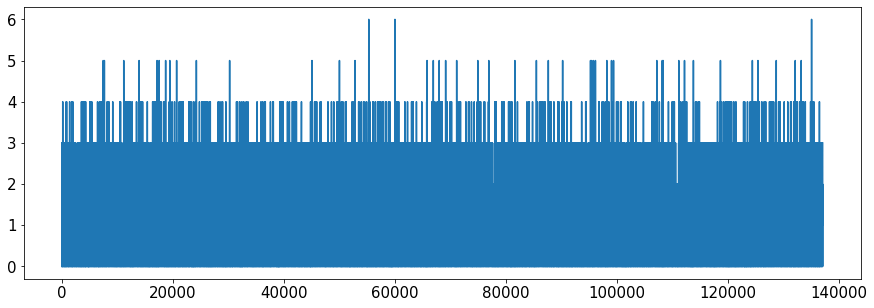

In [3]:
FIRST_CHANNEL = 8
df['sum'] = df.iloc[:,FIRST_CHANNEL:-1].sum(axis=1)

plt.figure(figsize=(15,5))
matplotlib.rcParams.update({'font.size': 15})

plt.plot(df['sum'])

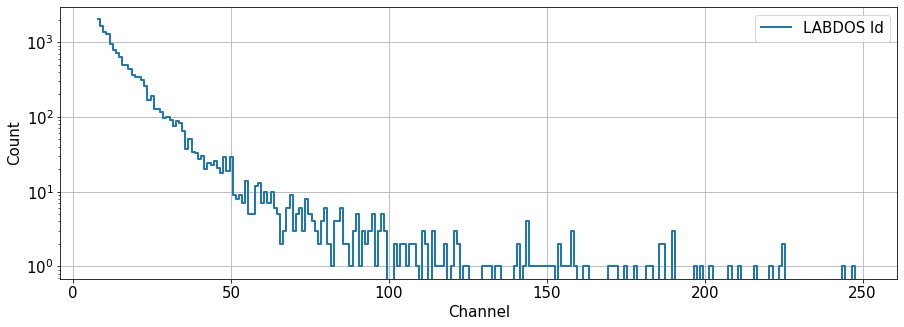

In [187]:
ener = df.iloc[:,FIRST_CHANNEL:250].sum()
#ener = df.iloc[0:round(3*24*60*60/10),FIRST_CHANNEL:250].sum()

plt.figure(figsize=(15,5))
matplotlib.rcParams.update({'font.size': 15})
plt.yscale('log')

plt.plot(ener, label='LABDOS '+sn1[-2:], lw=2, drawstyle='steps-mid')
plt.legend()
plt.xlabel('Channel')
plt.ylabel('Count')
plt.grid()

In [5]:
int(df.iloc[-1,2])/60/60/24

16.457997685185184

0.171 0.071


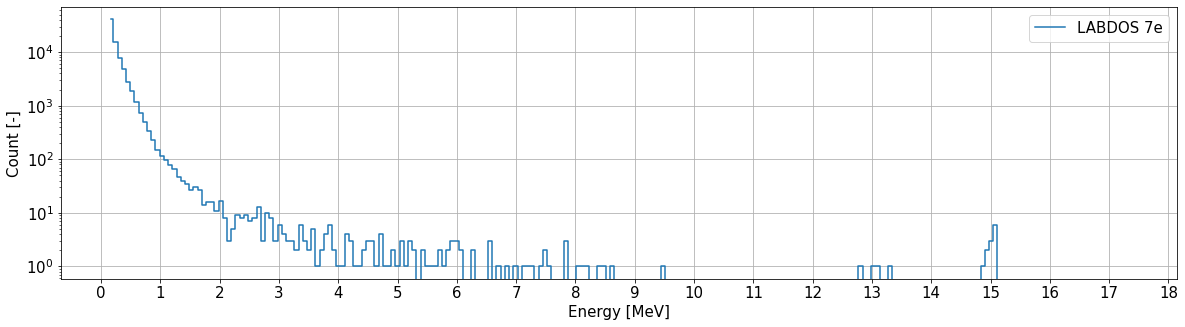

In [6]:
coef1 = np.array([0.,0.])
coef1[1] = 0.071
coef1[0] = 0.136 + 0.035

print (coef1[0], coef1[1])

e1 = pd.DataFrame()
e1['1'] = ener
e1['i'] = ener.index
e1['x'] = (e1['i'].astype(float)-FIRST_CHANNEL) * coef1[1] + coef1[0]

plt.figure(figsize=(20,5))
matplotlib.rcParams.update({'font.size': 15})
plt.yscale('log')
#plt.xscale('log')

plt.plot(e1['x'], e1['1'] , label='LABDOS '+sn1[-2:], drawstyle='steps-mid')

plt.xlabel('Energy [MeV]')
plt.ylabel('Count [-]')
plt.grid()
#plt.grid(visible=True, which='major', color='gray', linestyle='-')
#plt.grid(visible=True, axis='x', which='minor', color='lightgray', linestyle=':')
plt.legend()
plt.xticks(np.arange(0, 19, 1))
None

In [36]:
fto = '/storage/experiments/2022/10_labdos_italy/labdos2_TG_2210051139.txt' #  File to Open

l=[]
l.extend(range(0,257))
df = pd.read_csv(fto, sep=',', header=None, names=l, comment='*', low_memory=False)#,engine='python' )
df = df.reset_index(drop=True)
sn2 = df.loc[df[0]=='$DOS'].iloc[0,5]
print("S.N.: ", sn2)
df = df.loc[df[0]=='$HIST']

S.N.:  1290c00806a200914056a000a0000087


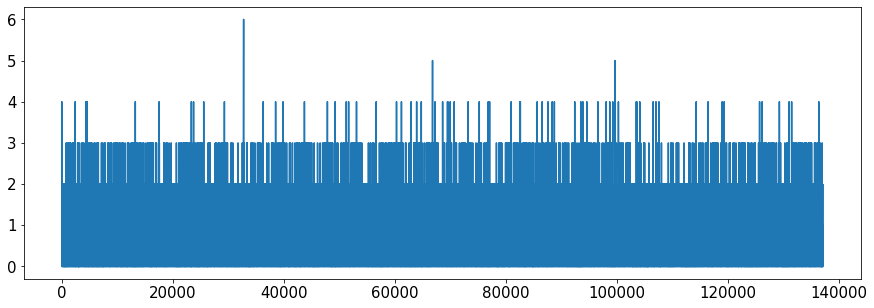

In [8]:
FIRST_CHANNEL = 8
df['sum'] = df.iloc[:,FIRST_CHANNEL:-1].sum(axis=1)

plt.figure(figsize=(15,5))
matplotlib.rcParams.update({'font.size': 15})

plt.plot(df['sum'])

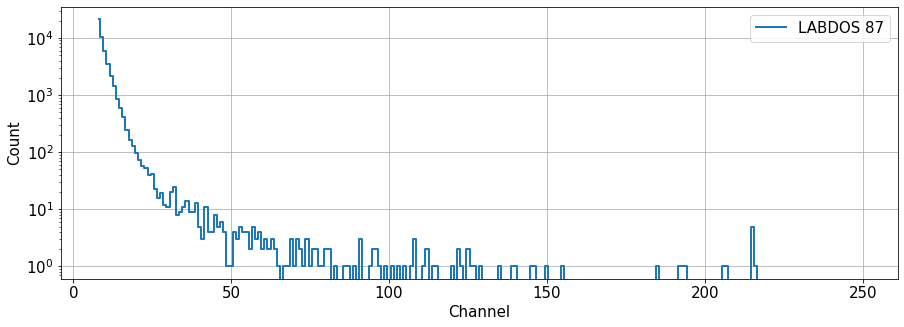

In [9]:
ener = df.iloc[:,FIRST_CHANNEL:250].sum()

plt.figure(figsize=(15,5))
matplotlib.rcParams.update({'font.size': 15})
plt.yscale('log')

plt.plot(ener, label='LABDOS '+sn2[-2:], lw=2, drawstyle='steps-mid')
plt.legend()
plt.xlabel('Channel')
plt.ylabel('Count')
plt.grid()

0.171 0.071


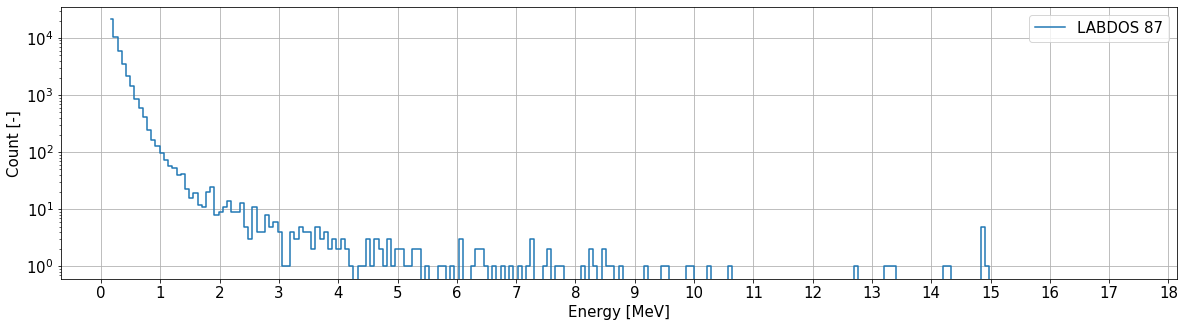

In [10]:
coef2 = np.array([0.,0.])
coef2[1] = 0.071
coef2[0] = 0.136 + 0.035


print (coef2[0], coef2[1])

e2 = pd.DataFrame()
e2['1'] = ener
e2['i'] = ener.index
e2['x'] = (e2['i'].astype(float)-FIRST_CHANNEL) * coef2[1] + coef2[0]

plt.figure(figsize=(20,5))
matplotlib.rcParams.update({'font.size': 15})
plt.yscale('log')
#plt.xscale('log')

plt.plot(e2['x'], e2['1'] , label='LABDOS '+sn2[-2:], drawstyle='steps-mid')

plt.xlabel('Energy [MeV]')
plt.ylabel('Count [-]')
plt.grid()
#plt.grid(visible=True, which='major', color='gray', linestyle='-')
#plt.grid(visible=True, axis='x', which='minor', color='lightgray', linestyle=':')
plt.legend()
plt.xticks(np.arange(0, 19, 1))
None

In [11]:
fto = '/storage/experiments/2022/10_labdos_italy/labdos3_TG_2210051138.txt' #  File to Open

l=[]
l.extend(range(0,505))
df = pd.read_csv(fto, sep=',', header=None, names=l, comment='*', low_memory=False)#,engine='python' )
df = df.reset_index(drop=True)
sn3 = df.loc[df[0]=='$DOS'].iloc[0,5]
print("S.N.: ", sn3)
df = df.loc[df[0]=='$HIST']

S.N.:  1290c00806a20091a456a000a0000090


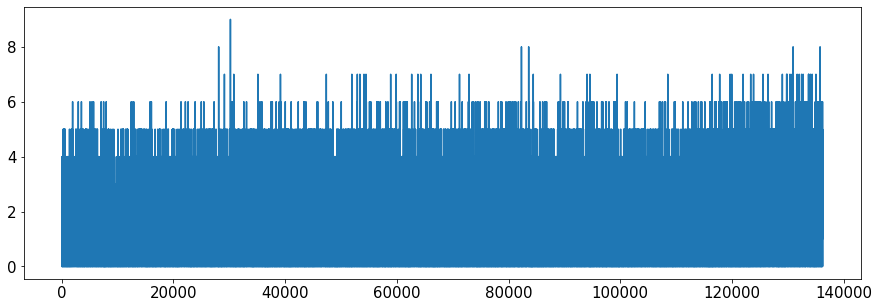

In [12]:
FIRST_CHANNEL = 9
df['sum'] = df.iloc[:,FIRST_CHANNEL:-1].sum(axis=1)

plt.figure(figsize=(15,5))
matplotlib.rcParams.update({'font.size': 15})

plt.plot(df['sum'])

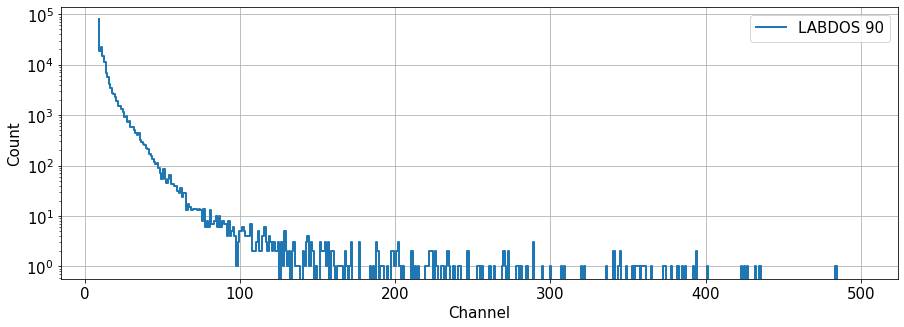

In [13]:
ener = df.iloc[:,FIRST_CHANNEL:500].sum()

plt.figure(figsize=(15,5))
matplotlib.rcParams.update({'font.size': 15})
plt.yscale('log')

plt.plot(ener, label='LABDOS '+sn3[-2:], lw=2, drawstyle='steps-mid')
plt.legend()
plt.xlabel('Channel')
plt.ylabel('Count')
plt.grid()

0.07 0.02


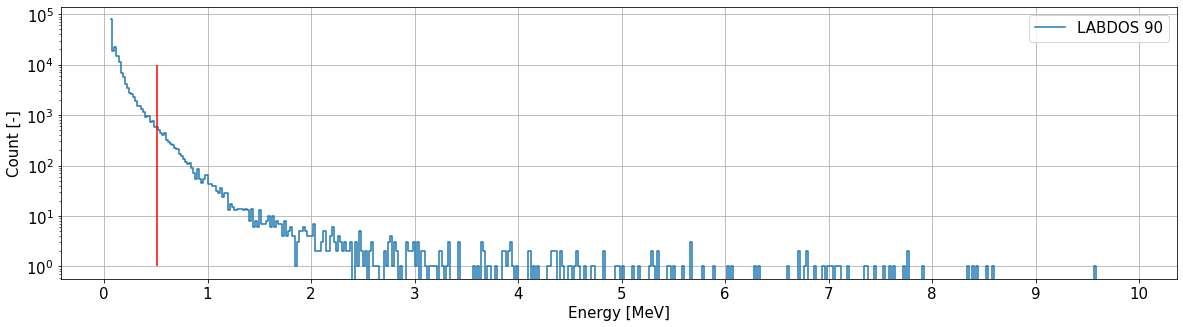

In [14]:
coef3 = np.array([0.,0.])
coef3[1] = 0.020
coef3[0] = 0.07
#coef[1] = 0.03
#coef[0] = 0.06

#(60 keV +-15 keV) + CH * 30 keV 

print (coef3[0], coef3[1])

e3 = pd.DataFrame()
e3['1'] = ener
e3['i'] = ener.index
e3['x'] = (e3['i'].astype(float)-FIRST_CHANNEL) * coef3[1] + coef3[0]

plt.figure(figsize=(20,5))
matplotlib.rcParams.update({'font.size': 15})
plt.yscale('log')
#plt.xscale('log')

plt.plot(e3['x'], e3['1'] , label='LABDOS '+sn3[-2:], drawstyle='steps-mid')

plt.xlabel('Energy [MeV]')
plt.ylabel('Count [-]')
plt.grid()
plt.legend()
plt.xticks(np.arange(0, 16, 1))
#plt.xlim(0,2)
plt.vlines(0.511,1,1e4, color='red')

None

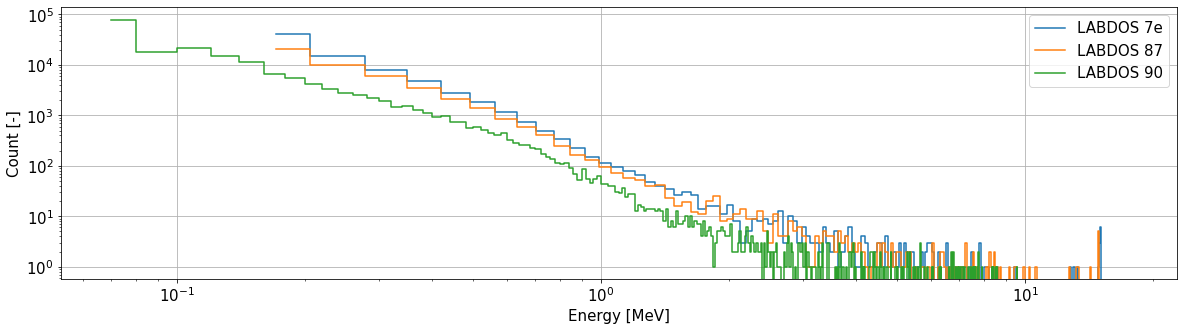

In [15]:
plt.figure(figsize=(20,5))
matplotlib.rcParams.update({'font.size': 15})
plt.yscale('log')
plt.xscale('log')

plt.plot(e1['x'], e1['1'] , label='LABDOS '+sn1[-2:], drawstyle='steps-mid')
plt.plot(e2['x'], e2['1'] , label='LABDOS '+sn2[-2:], drawstyle='steps-mid')
plt.plot(e3['x'], e3['1'] , label='LABDOS '+sn3[-2:], drawstyle='steps-mid')

plt.xlabel('Energy [MeV]')
plt.ylabel('Count [-]')
plt.grid()
plt.legend()
#plt.xticks(np.arange(0, 18, 1))
#plt.xlim(0,4)
None

# Liulin comparison

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy as sp
import numpy
import xml.etree.ElementTree as ET
from glob import glob
import datetime
%matplotlib inline

In [17]:
filename = '/storage/experiments/2022/10_labdos_italy/1901291336.y0R'

# extract time
path = filename.split('/')
time = path[-1].split('.')
print (time)
date_object = datetime.datetime.strptime(time[0], '%y%m%d%H%M')
print (date_object)

# read data
liulin = pd.read_csv(filename, header = None, sep = ' ', skiprows = 1) # read Liulin data Y
liulin = liulin.drop(256, axis=1) # delete last empty column
infile = open(filename, 'r')
header = infile.readline()
print (header) # print data header
#exposition = header.split(' ')[4].split('[')[0] # extract exposition time  
exposition = header.split()[3].split('[')[0] # Italian Liulin
exposition_val = float(exposition)
exposition += 'S'
print (exposition)

['1901291336', 'y0R']
2019-01-29 13:36:00
Liu-AR   EXPOSITION = 300[sec]

300S


(25799040.0, 25944480.0)

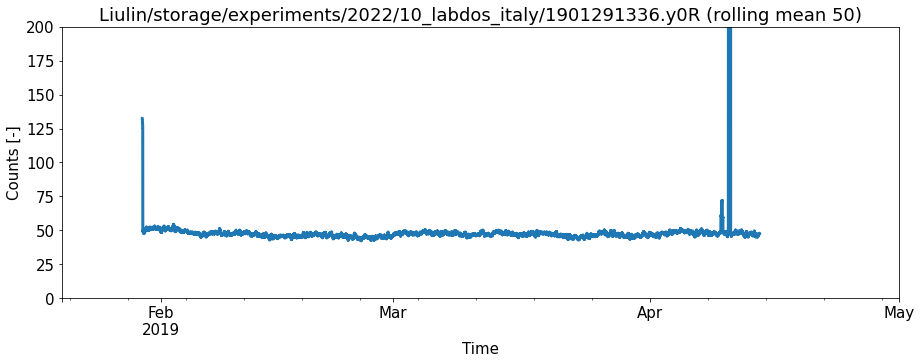

In [18]:
liulin_data = pd.DataFrame(index = pd.date_range(date_object, freq=exposition, periods=len(liulin)).tolist(), data = liulin.values)
liulin_data['flux'] = liulin_data[range(0,256)].sum(axis=1)

WINDOW = 50
liulin_data['flux'] = liulin_data['flux'].rolling(WINDOW).mean()

#liulin_data
plt.figure(figsize=(15, 5))
matplotlib.rcParams.update({'font.size': 15})
liulin_data['flux'].plot(drawstyle='steps', linewidth=3)
plt.title('Liulin' + filename + ' (rolling mean ' + str(WINDOW) + ')')
plt.ylabel('Counts [-]')
plt.xlabel('Time')
plt.ylim(0, 200)
plt.xlim('2019-01-20','2019-05')


(0.0, 200.0)

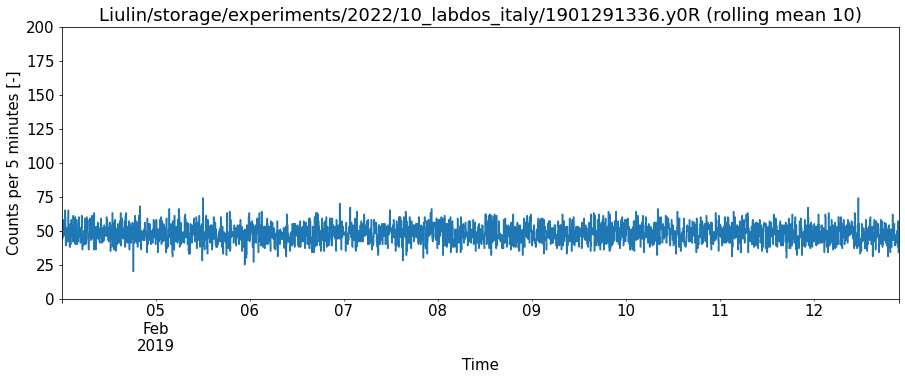

In [19]:
liulin_data = pd.DataFrame(index = pd.date_range(date_object, freq=exposition, periods=len(liulin)).tolist(), data = liulin.values)
liulin_data['flux'] = liulin_data[range(0,256)].sum(axis=1)
liulin_data = liulin_data.loc['2019-02-04 00:00:00':pd.to_datetime('2019-02-04 00:00:00')+ pd.DateOffset(days=8.9)]

#from datetime import timedelta

WINDOW = 10
#liulin_data['flux'] = liulin_data['flux'].rolling(WINDOW).mean()
liulin_data['flux'] = liulin_data['flux'] 

#liulin_data
plt.figure(figsize=(15, 5))
matplotlib.rcParams.update({'font.size': 15})
liulin_data['flux'].plot(drawstyle='steps')
plt.title('Liulin' + filename + ' (rolling mean ' + str(WINDOW) + ')')
plt.ylabel('Counts per 5 minutes [-]')
plt.xlabel('Time')
plt.ylim(0, 200)


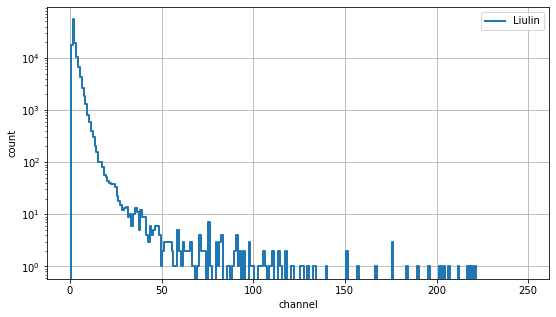

In [20]:
matplotlib.rcParams.update({'font.size': 10})

LOW_ENERGY = 0

ener1 = liulin_data.iloc[:,LOW_ENERGY:250].sum()

plt.figure(figsize=(9,5))
plt.yscale('log')

plt.plot(ener1, label='Liulin', lw=2, drawstyle='steps-mid')
plt.legend()
plt.xlabel('channel')
plt.ylabel('count')
plt.grid()

#plt.xlim([10,150])



0.131 0.047


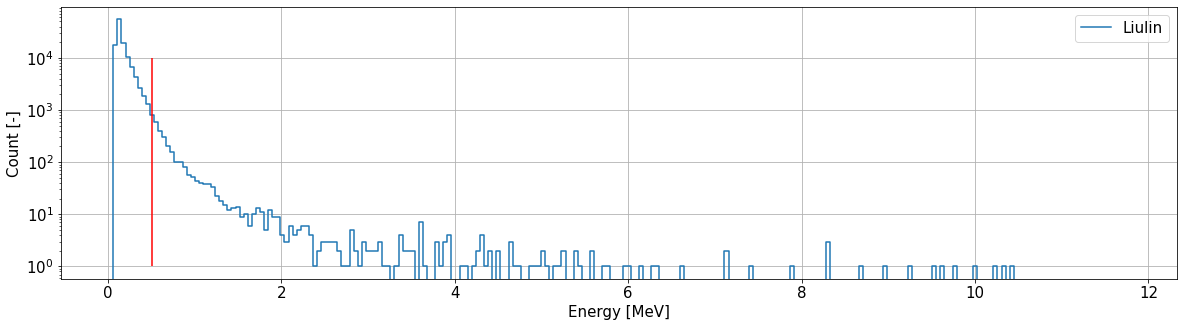

In [21]:
FIRST_CHANNEL = 2

coef4 = np.array([0.,0.])
coef4[1] = 0.047
coef4[0] = 0.131

print (coef4[0], coef4[1])

e4 = pd.DataFrame()
e4['1'] = ener1
e4['i'] = ener1.index
e4['x'] = (e4['i'].astype(float)-FIRST_CHANNEL) * coef4[1] + coef4[0]

plt.figure(figsize=(20,5))
matplotlib.rcParams.update({'font.size': 15})
plt.yscale('log')
#plt.xscale('log')

plt.plot(e4['x'], e4['1'] , label='Liulin', drawstyle='steps-mid')

plt.xlabel('Energy [MeV]')
plt.ylabel('Count [-]')
plt.grid()
plt.legend()
#plt.xticks(np.arange(0, 16, 1))
#plt.xlim(0,2)
plt.vlines(0.511,1,1e4, color='red')

None

0.158 0.061


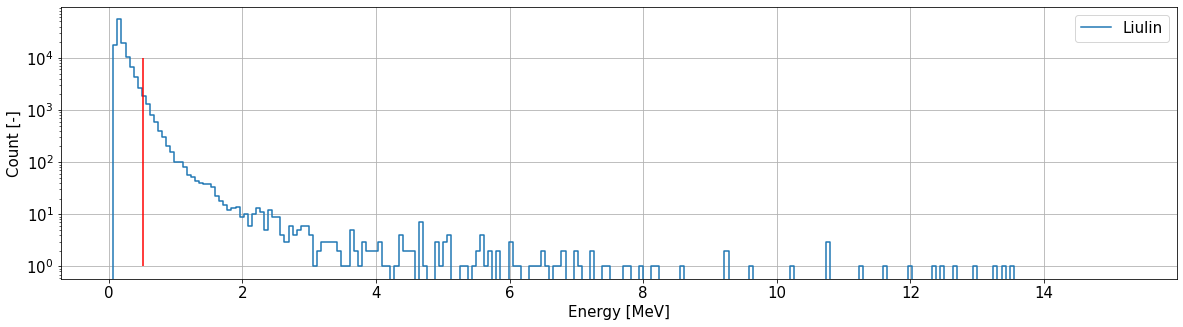

In [22]:
FIRST_CHANNEL = 2

coef5 = np.array([0.,0.])
coef5[1] = 0.061
coef5[0] = 0.158

print (coef5[0], coef5[1])

e5 = pd.DataFrame()
e5['1'] = ener1
e5['i'] = ener1.index
e5['x'] = (e5['i'].astype(float)-FIRST_CHANNEL) * coef5[1] + coef5[0]

plt.figure(figsize=(20,5))
matplotlib.rcParams.update({'font.size': 15})
plt.yscale('log')
#plt.xscale('log')

plt.plot(e5['x'], e5['1'] , label='Liulin', drawstyle='steps-mid')

plt.xlabel('Energy [MeV]')
plt.ylabel('Count [-]')
plt.grid()
plt.legend()
#plt.xticks(np.arange(0, 16, 1))
#plt.xlim(0,2)
plt.vlines(0.511,1,1e4, color='red')

None

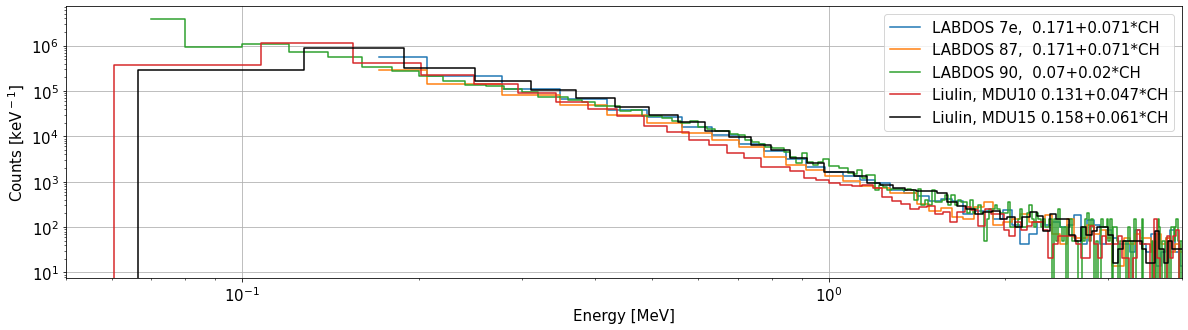

In [23]:
plt.figure(figsize=(20,5))
matplotlib.rcParams.update({'font.size': 15})
plt.yscale('log')
plt.xscale('log')

plt.plot(e1['x'], e1['1']/coef1[1] , label='LABDOS '+sn1[-2:] + ',  ' + str(coef1[0]) + '+' + str(coef1[1]) + '*CH', drawstyle='steps-mid')
plt.plot(e2['x'], e2['1']/coef2[1] , label='LABDOS '+sn2[-2:] + ',  ' + str(coef2[0]) + '+' + str(coef2[1]) + '*CH', drawstyle='steps-mid')
plt.plot(e3['x'], e3['1']/coef3[1] , label='LABDOS '+sn3[-2:] + ',  ' + str(coef3[0]) + '+' + str(coef3[1]) + '*CH', drawstyle='steps-mid')
plt.plot(e4['x'], e4['1']/coef4[1] , label='Liulin, MDU10 ' + str(coef4[0]) + '+' + str(coef4[1]) + '*CH', drawstyle='steps-mid')
plt.plot(e5['x'], e5['1']/coef5[1] , label='Liulin, MDU15 ' + str(coef5[0]) + '+' + str(coef5[1]) + '*CH', drawstyle='steps-mid', color='black')

plt.xlabel('Energy [MeV]')
plt.ylabel('Counts [keV$^-$$^1$]')
plt.grid()
plt.legend()
#plt.xticks(np.arange(0, 18, 1))
plt.xlim(0.05,4)
None

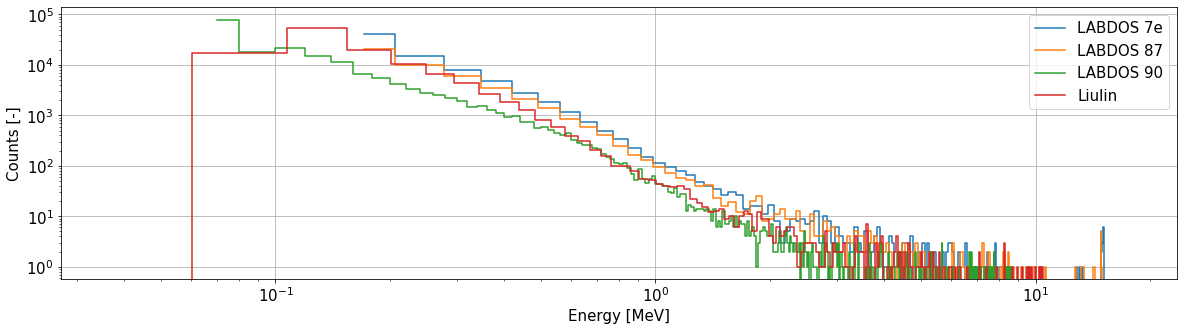

In [24]:
plt.figure(figsize=(20,5))
matplotlib.rcParams.update({'font.size': 15})
plt.yscale('log')
plt.xscale('log')

plt.plot(e1['x'], e1['1'] , label='LABDOS '+sn1[-2:], drawstyle='steps-mid')
plt.plot(e2['x'], e2['1'] , label='LABDOS '+sn2[-2:], drawstyle='steps-mid')
plt.plot(e3['x'], e3['1'] , label='LABDOS '+sn3[-2:], drawstyle='steps-mid')
plt.plot(e4['x'], e4['1'] , label='Liulin', drawstyle='steps-mid')

plt.xlabel('Energy [MeV]')
plt.ylabel('Counts [-]')
plt.grid()
plt.legend()
#plt.xticks(np.arange(0, 18, 1))
#plt.xlim(0,4)
None

# LS

In [36]:
fto = '/storage/experiments/2023/02_LS_LABDOS_test/2.TXT' #  File to Open
fto = '/storage/stations/LS/Labdos/labdos_1680732018_ttyUSB1.log'
fto = '/storage/stations/LS/Labdos/labdos_1680645618_ttyUSB1.log'

l=[]
l.extend(range(0,506))
df = pd.read_csv(fto, sep=',', header=None, names=l, comment='#', low_memory=False)#,engine='python' )
df = df.reset_index(drop=True)
sn1 = df.loc[df[0]=='$DOS'].iloc[0,6]
print("S.N.: ", sn1)
df = df.loc[df[0]=='$HIST']
df = df.iloc[200:,:]

IndexError: index 0 is out of bounds for axis 0 with size 0

In [37]:
sn1 = df.loc[df[1]=='$DOS'].iloc[0,7]
print("S.N.: ", sn1)
df = df.loc[df[1]=='$HIST']
df = df.iloc[10:,:]

S.N.:  1290c00806a200917456a000a000002a


In [38]:
df.loc[df[1]=='$DOS']

,0,1,2,3,4,5,6,7,8,9,...,496,497,498,499,500,501,502,503,504,505


Text(0, 0.5, 'Counts')

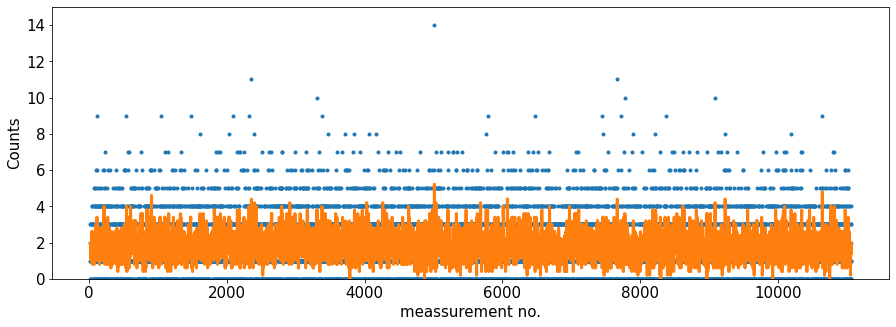

In [39]:
FIRST_CHANNEL = 9
df['sum'] = df.iloc[:,FIRST_CHANNEL:-2].sum(axis=1)
df['roll'] = df['sum'].rolling(5).mean()


plt.figure(figsize=(15,5))
matplotlib.rcParams.update({'font.size': 15})

plt.plot(df['sum'], marker='.', linestyle='')
plt.plot(df['roll'], linewidth=3)
plt.ylim(0,15)
plt.xlabel('meassurement no.')
plt.ylabel('Counts')


In [91]:
# print runs indexes
run=0
for i,r in df.iterrows():
    if (r[0] == '$DOS'):
        run = run + 1
        print(i)
    df.iloc[i].run = run

0
1
131
133
169
171
188
196
3926
3929
4698
5396


In [39]:
#df[4] = pd.to_numeric(df[4], errors='coerce')
#df.loc[df[4]>7].loc[:,8:20]
df

,0,1,2,3,4,5,6,7,8,9,...,495,496,497,498,499,500,501,502,503,504
208,$HIST,11,93.59,497,5,12170,49571,3263.0,2.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
209,$HIST,12,101.35,468,0,12192,49410,3432.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
210,$HIST,13,109.14,482,2,12034,49677,3320.0,2.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
211,$HIST,14,116.91,476,3,12284,49622,3118.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
212,$HIST,15,124.68,499,4,11750,49929,3332.0,3.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8069,$HIST,2672,20870.9,500,0,18089,44900,1994.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8070,$HIST,2673,20877.90,513,0,17572,45321,2053.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8071,$HIST,2674,20885.72,516,0,17773,45083,2097.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8072,$HIST,2675,20893.53,511,0,18493,44476,1978.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


(0.0, 20.0)

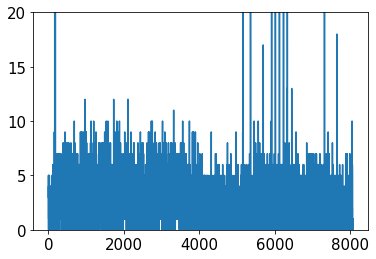

In [87]:
plt.plot(df[4])
plt.ylim(0,20)

GEODOS SA
8 0.034 MeV
Pu-239 335 5.15659 MeV
Am-241 356 5.48556 MeV
ch. =  0.0156652380952381 keV
0.034 + ch * 0.016


In [189]:
# Uranium glass
fto = '/storage/experiments/2023/0301_SA/uranium_glass/0.TXT' #  File to Open
fto = '/storage/experiments/2023/03_balonek/ref2_5V/0.TXT' #  File to Open
#fto = '/storage/experiments/2023/03_balonek/Am/0.TXT' #  File to Open
#fto = '/storage/experiments/2023/03_balonek/ref5V/0.TXT' #  File to Open
#fto = '/storage/experiments/2023/0301_SA/PuAm/0.TXT' #  File to Open
fto = '/storage/experiments/2023/12_Korea_calibration/67/0.TXT'

l=[]
l.extend(range(0,520))
df = pd.read_csv(fto, sep=',', header=None, names=l, comment='*', low_memory=False)#,engine='python' )
df = df.reset_index(drop=True)
sn3 = df.loc[df[0]=='$DOS'].iloc[0,6]
print("S.N.: ", sn3)
df = df.loc[df[0]=='$HIST']

S.N.:  1290c00806a200905013a000a0000067


In [190]:
df

,0,1,2,3,4,5,6,7,8,9,...,510,511,512,513,514,515,516,517,518,519
1,$HIST,0,11.24,21380,70,245,17649,6730.0,9.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,$HIST,1,22.37,21491,65,294,18132,6089.0,12.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,$HIST,2,33.49,21674,76,382,18904,5041.0,6.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,$HIST,3,44.62,21648,76,335,18795,5219.0,10.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,$HIST,4,55.77,21709,62,380,18964,4963.0,5.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
276,$HIST,275,3073.17,21673,80,334,18814,5173.0,9.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
277,$HIST,276,3084.30,21642,88,375,18774,5194.0,10.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
278,$HIST,277,3095.42,21726,48,407,19104,4791.0,7.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
279,$HIST,278,3106.55,21676,82,341,18816,5161.0,6.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Text(0, 0.5, 'Counts')

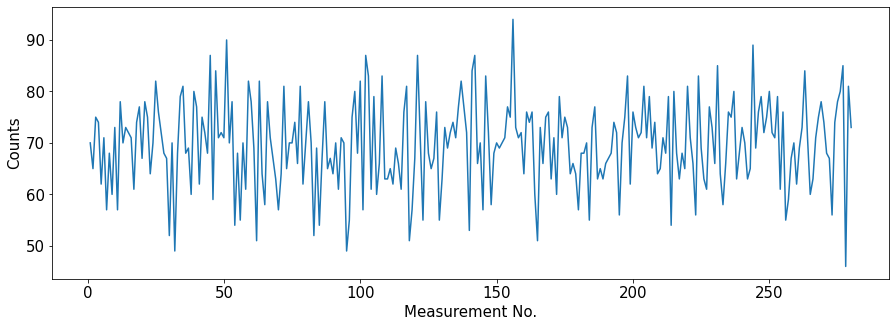

In [196]:
FIRST_CHANNEL = 12
df['sum'] = df.iloc[:,FIRST_CHANNEL:-1].sum(axis=1)

plt.figure(figsize=(15,5))
matplotlib.rcParams.update({'font.size': 15})

#df = df.iloc[10:90]
#df = df.iloc[110:200]
#df = df.iloc[40:120]

plt.plot(df['sum'])
plt.xlabel('Measurement No.')
plt.ylabel('Counts')

#plt.ylim(0,1000)

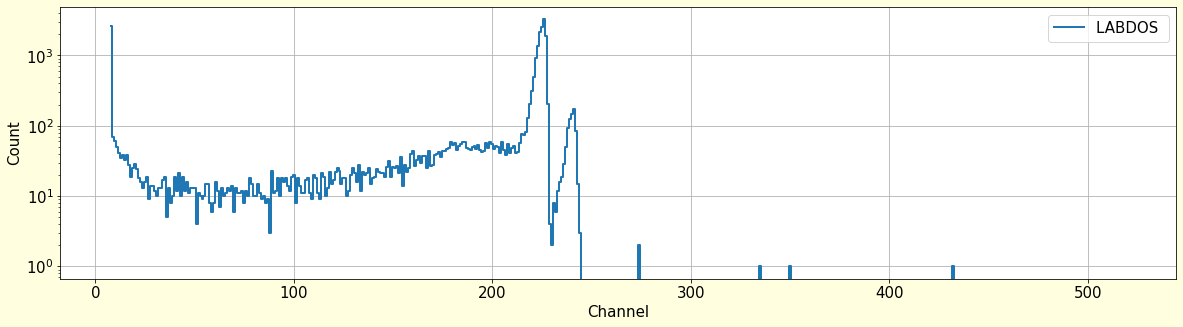

In [204]:
FIRST_CHANNEL = 8
ener = df.iloc[:,FIRST_CHANNEL:520].sum()

plt.figure(figsize=(20,5), facecolor='lightyellow')
matplotlib.rcParams.update({'font.size': 15})
plt.yscale('log')
#plt.xscale('log')

plt.plot(ener, label='LABDOS ', lw=2, drawstyle='steps-mid')
plt.legend()
plt.xlabel('Channel')
plt.ylabel('Count')
plt.grid()
#plt.vlines(356,1,1e4, color='red')
#plt.xlim(0,450)


In [30]:
df

,0,1,2,3,4,5,6,7,8,9,...,498,499,500,501,502,503,504,505,sum,roll
5,1.680732e+09,$HIST,0,7.97,488.0,2,9858,53200,1971.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,NaN
6,1.680732e+09,$HIST,1,15.75,470.0,2,10064,53009,1973.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,NaN
7,1.680732e+09,$HIST,2,23.52,455.0,1,9568,53199,2293.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,NaN
8,1.680732e+09,$HIST,3,31.31,492.0,1,9126,53630,2275.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,NaN
9,1.680732e+09,$HIST,4,39.9,515.0,5,9012,53580,2409.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,2.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7257,1.680789e+09,$HIST,7252,56507.97,485.0,3,9048,53639,2347.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,3.0
7258,1.680789e+09,$HIST,7253,56515.79,509.0,4,9332,53354,2322.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0,3.0
7259,1.680789e+09,$HIST,7254,56523.61,484.0,1,9133,53527,2373.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,3.0
7260,1.680789e+09,$HIST,7255,56531.45,456.0,1,9347,53400,2310.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0


0.034 0.01567


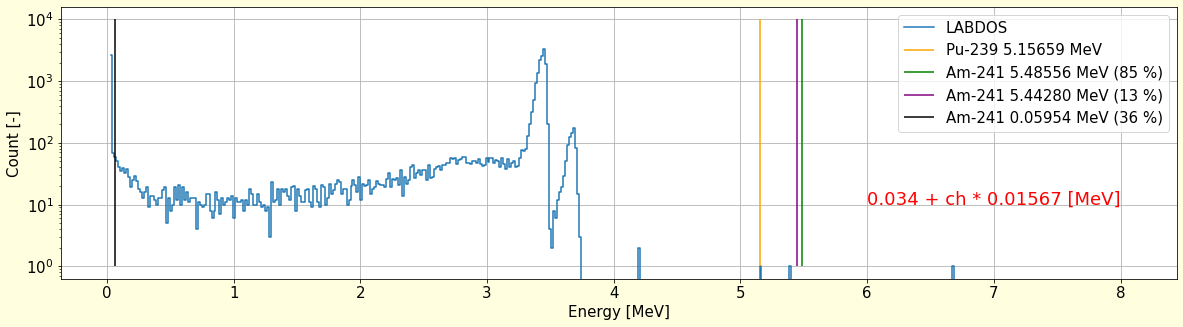

In [205]:
coef3 = np.array([0.,0.])
coef3[1] = 0.01567
coef3[0] = 0.034
#coef[1] = 0.03
#coef[0] = 0.06

#(60 keV +-15 keV) + CH * 30 keV 

print (coef3[0], coef3[1])

e3 = pd.DataFrame()
e3['1'] = ener
e3['i'] = ener.index
e3['x'] = (e3['i'].astype(float)-FIRST_CHANNEL) * coef3[1] + coef3[0]

plt.figure(figsize=(20,5), facecolor='lightyellow')
matplotlib.rcParams.update({'font.size': 15})
plt.yscale('log')
#plt.xscale('log')

plt.plot(e3['x'], e3['1'] , label='LABDOS', drawstyle='steps-mid')

plt.xlabel('Energy [MeV]')
plt.ylabel('Count [-]')
plt.grid()
plt.xticks(np.arange(0, 16, 1))
#plt.xlim(4,8)
#plt.vlines(0.511,1,1e4, color='red')
plt.vlines(5.15659,1,1e4, color='orange', label='Pu-239 5.15659 MeV')
plt.vlines(5.48556,1,1e4, color='green', label='Am-241 5.48556 MeV (85 %)')
plt.vlines(5.44280,1,1e4, color='purple', label='Am-241 5.44280 MeV (13 %)')
plt.vlines(0.05954 ,1,1e4, color='black', label='Am-241 0.05954 MeV (36 %)')
plt.text(6, 10, str(coef3[0]) + ' + ch * ' + str(coef3[1]) + ' [MeV]', fontsize=18, color='r')
plt.legend()


None

0.034 0.01567


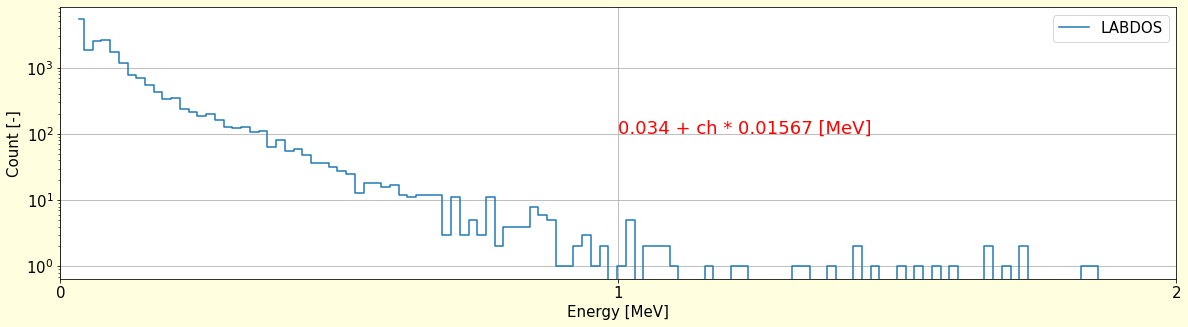

In [42]:
coef3 = np.array([0.,0.])
coef3[1] = 0.01567
coef3[0] = 0.034
#coef[1] = 0.03
#coef[0] = 0.06

#(60 keV +-15 keV) + CH * 30 keV 

print (coef3[0], coef3[1])

e3 = pd.DataFrame()
e3['1'] = ener
e3['i'] = ener.index
e3['x'] = (e3['i'].astype(float)-FIRST_CHANNEL) * coef3[1] + coef3[0]

plt.figure(figsize=(20,5), facecolor='lightyellow')
matplotlib.rcParams.update({'font.size': 15})
plt.yscale('log')
#plt.xscale('log')

plt.plot(e3['x'], e3['1'] , label='LABDOS', drawstyle='steps-mid')

plt.xlabel('Energy [MeV]')
plt.ylabel('Count [-]')
plt.grid()
plt.xticks(np.arange(0, 16, 1))
plt.xlim(0,2)
#plt.vlines(0.511,1,1e4, color='red')
#plt.vlines(5.15659,1,1e4, color='orange', label='Pu-239 5.15659 MeV')
#plt.vlines(5.48556,1,1e4, color='green', label='Am-241 5.48556 MeV (85 %)')
#plt.vlines(5.44280,1,1e4, color='purple', label='Am-241 5.44280 MeV (13 %)')
#plt.vlines(0.05954 ,1,1e4, color='black', label='Am-241 0.05954 MeV (36 %)')
plt.text(1, 100, str(coef3[0]) + ' + ch * ' + str(coef3[1]) + ' [MeV]', fontsize=18, color='r')
plt.legend()


None

0.034 0.01567


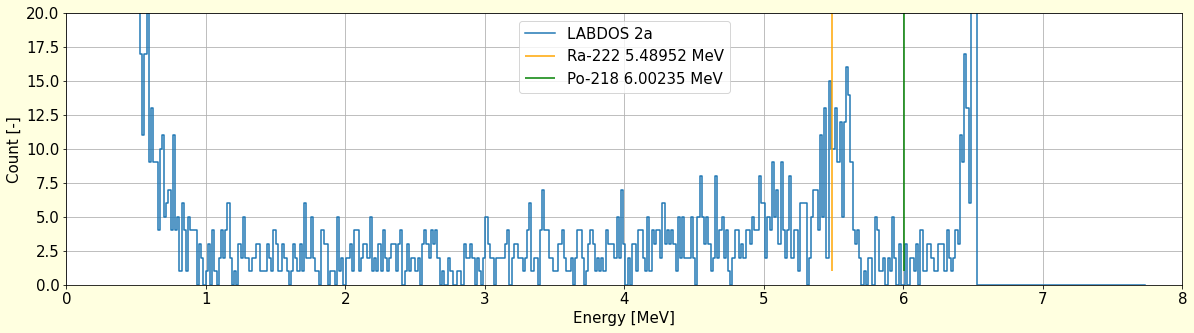

In [33]:
# Radon
coef3 = np.array([0.,0.])
coef3[1] = 0.01567
#coef3[1] = 0.017
coef3[0] = 0.034
#coef[1] = 0.03
#coef[0] = 0.06

#(60 keV +-15 keV) + CH * 30 keV 

print (coef3[0], coef3[1])

e3 = pd.DataFrame()
e3['1'] = ener
e3['i'] = ener.index
e3['x'] = (e3['i'].astype(float)-FIRST_CHANNEL) * coef3[1] + coef3[0]

plt.figure(figsize=(20,5), facecolor='lightyellow')
matplotlib.rcParams.update({'font.size': 15})
#plt.yscale('log')
#plt.xscale('log')

plt.plot(e3['x'], e3['1'] , label='LABDOS '+sn3[-2:], drawstyle='steps-mid')

plt.xlabel('Energy [MeV]')
plt.ylabel('Count [-]')
plt.grid()
plt.xticks(np.arange(0, 16, 1))
plt.xlim(0,8)
plt.ylim(0,20)
#plt.vlines(0.511,1,1e4, color='red')
plt.vlines(5.48952,1,1e4, color='orange', label='Ra-222 5.48952 MeV')
plt.vlines(6.00235,1,1e4, color='green', label='Po-218 6.00235 MeV')
#plt.text(1, 1e3, str(coef3[0]) + ' + ch * ' + str(coef3[1]) + ' [MeV]', fontsize=18, color='r')
plt.legend()


None

## HIMAC

In [3]:
fto = '/storage/experiments/2023/03_HIMAC/SPACEDOS_HIGH/spacedos_N_2.csv'
fto = '/storage/experiments/2023/03_HIMAC/SPACEDOS_HIGH/spacedos_Si_2.csv'
fto = '/storage/experiments/2023/03_HIMAC/SPACEDOS_HIGH/spacedos_Ar_center.csv'

l=[]
l.extend(range(0,260))
df = pd.read_csv(fto, sep=',', header=None, names=l, comment='*', low_memory=False)#,engine='python' )
df = df.reset_index(drop=True)
sn3 = df.loc[df[1]=='$AIRDOS'].iloc[0,5]
print("S.N.: ", sn3)
df = df.loc[df[1]=='$CANDY']

S.N.:  ffffffffffffffffffffffffffffffff


Text(0, 0.5, 'Counts')

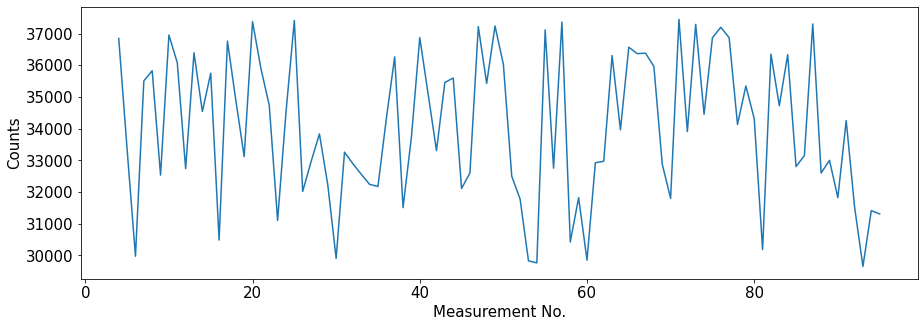

In [92]:
FIRST_CHANNEL = 8
df['sum'] = df.iloc[:,FIRST_CHANNEL:-1].sum(axis=1)

plt.figure(figsize=(15,5))
matplotlib.rcParams.update({'font.size': 15})

#df = df.iloc[10:90]

plt.plot(df['sum'])
plt.xlabel('Measurement No.')
plt.ylabel('Counts')

#plt.ylim(0,1000)

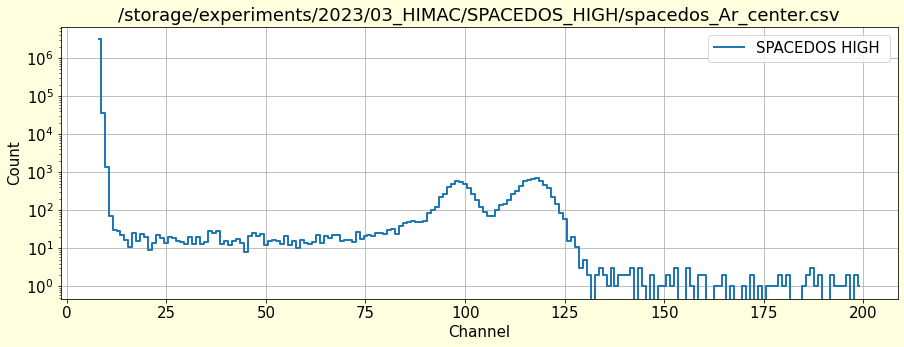

In [93]:
ener = df.iloc[:,FIRST_CHANNEL:200].sum()

plt.figure(figsize=(15,5), facecolor='lightyellow')
matplotlib.rcParams.update({'font.size': 15})
plt.yscale('log')

plt.plot(ener, label='SPACEDOS HIGH ', lw=2, drawstyle='steps-mid')
plt.legend()
plt.xlabel('Channel')
plt.ylabel('Count')
plt.title(fto)
plt.grid()
#plt.vlines(356,1,1e4, color='red')
#plt.xlim(0,100)


## LS

In [47]:
fto = '/storage/stations/LS/Malina/run_87/Labdos/labdos_1686693618_ttyUSB2.log'
#fto = '/storage/stations/LS/Malina/run_96/Labdos/labdos_1687471220_ttyUSB1.log'
#fto = '/storage/stations/LS/Malina/run_94/Labdos/labdos_1687298418_ttyUSB1.log' # 21.6. 2023

l=[]
l.extend(range(0,506))
df = pd.read_csv(fto, sep=',', header=None, names=l, comment='*', low_memory=False)#,engine='python' )
df = df.reset_index(drop=True)
sn3 = df.loc[df[1]=='$DOS'].iloc[0,5]
print("S.N.: ", sn3)
df = df.loc[df[1]=='$HIST']

S.N.:  71cdf196883fa3ab648ae47327ef2137eb69420f


In [48]:
df['date'] = pd.to_datetime(df.iloc[:,0],unit='s')
df.set_index('date', drop=False, inplace=True)

/tmp/ipykernel_1009/810001439.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df['sum'] = df.iloc[:,FIRST_CHANNEL:-1].sum(axis=1)


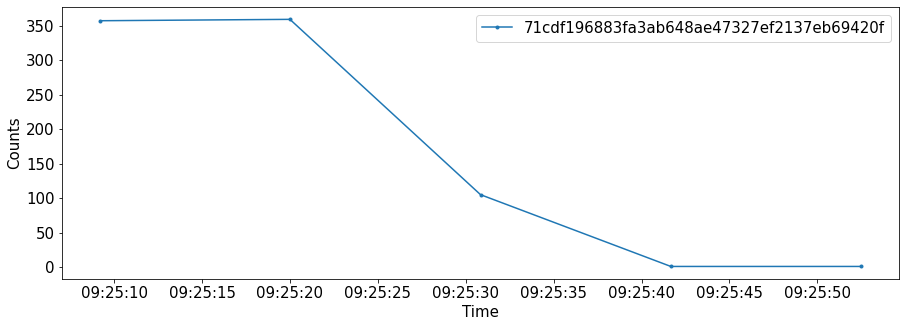

In [55]:
FIRST_CHANNEL = 10
df['sum'] = df.iloc[:,FIRST_CHANNEL:-1].sum(axis=1)

FROM = pd.to_datetime('2023-06-14 9:00:00')
TO = pd.to_datetime('2023-06-14 09:35:00')
FROM = pd.to_datetime('2023-06-14 9:25:00')
TO = pd.to_datetime('2023-06-14 09:26:00')
#FROM = pd.to_datetime('2023-06-21 19:23:00')
#TO = pd.to_datetime('2023-06-23 00:26:00')
xx = df.loc[FROM:TO]

plt.figure(figsize=(15,5))
matplotlib.rcParams.update({'font.size': 15})

#df = df.iloc[10:90]

plt.plot(xx['sum'], marker='.', label=sn3)
plt.xlabel('Time')
plt.ylabel('Counts')
plt.legend()

#plt.ylim(0,1000)
#plt.xlim(pd.to_datetime('2023-06-14 9:00:00'),pd.to_datetime('2023-06-14 09:35:00'))


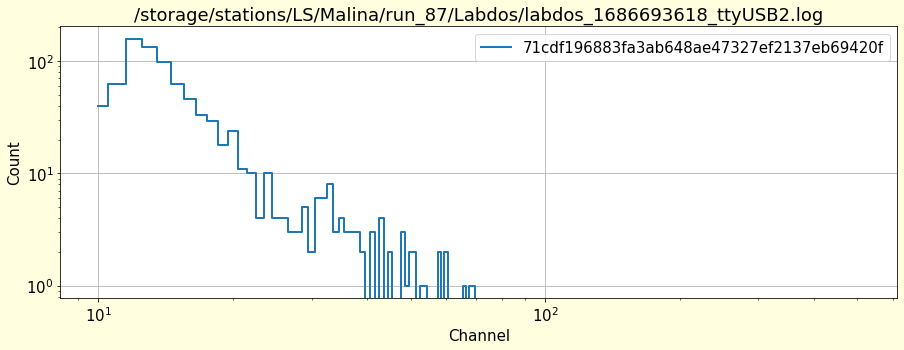

In [56]:
ener = xx.iloc[:,FIRST_CHANNEL:506].sum()

plt.figure(figsize=(15,5), facecolor='lightyellow')
matplotlib.rcParams.update({'font.size': 15})
plt.yscale('log')
plt.xscale('log')

plt.plot(ener, label=sn3, lw=2, drawstyle='steps-mid')
plt.legend()
plt.xlabel('Channel')
plt.ylabel('Count')
plt.title(fto)
plt.grid()
#plt.vlines(356,1,1e4, color='red')
#plt.xlim(0,100)


In [33]:
df

,0,1,2,3,4,5,6,7,8,9,...,498,499,500,501,502,503,504,505,date,sum
date,,,,,,,,,,,,,,,,,,,,,
2023-06-20 22:01:12.560982784,1.687298e+09,$HIST,0,24.69,625.0,5,10069,52634,2178.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2023-06-20 22:01:12.560982784,5.0
2023-06-20 22:01:36.300884736,1.687298e+09,$HIST,1,48.43,561.0,1,10495,52188,2268.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2023-06-20 22:01:36.300884736,1.0
2023-06-20 22:02:00.040281344,1.687299e+09,$HIST,2,72.17,598.0,1,13076,50220,1614.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2023-06-20 22:02:00.040281344,1.0
2023-06-20 22:02:23.818383616,1.687299e+09,$HIST,3,95.91,578.0,2,12662,50525,1736.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2023-06-20 22:02:23.818383616,2.0
2023-06-20 22:02:47.563639040,1.687299e+09,$HIST,4,119.69,554.0,0,12973,50366,1611.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2023-06-20 22:02:47.563639040,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-06-21 21:58:25.430066688,1.687385e+09,$HIST,3632,86254.85,538.0,3,11661,51372,1933.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2023-06-21 21:58:25.430066688,3.0
2023-06-21 21:58:49.170718976,1.687385e+09,$HIST,3633,86278.59,576.0,0,11597,51342,1998.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2023-06-21 21:58:49.170718976,0.0
2023-06-21 21:59:12.926927104,1.687385e+09,$HIST,3634,86302.33,584.0,1,11004,51832,2088.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2023-06-21 21:59:12.926927104,1.0


# Fik8

In [185]:
fto = '/storage/experiments/2023/12_Fik9/LABDOS01B/0.TXT'
#fto = '/storage/experiments/2023/12_Fik9/LABDOS01A/2.TXT'

l=[]
l.extend(range(0,505))
df = pd.read_csv(fto, sep=',', header=None, names=l, comment='*', low_memory=False)#,engine='python' )
df = df.reset_index(drop=True)
sn = df.loc[df[0]=='$DOS'].iloc[0,6]
print("S.N.: ", sn)
df = df.loc[df[0]=='$HIST']

S.N.:  1290c00806a200908414a000a000009c


Text(0, 0.5, 'Counts')

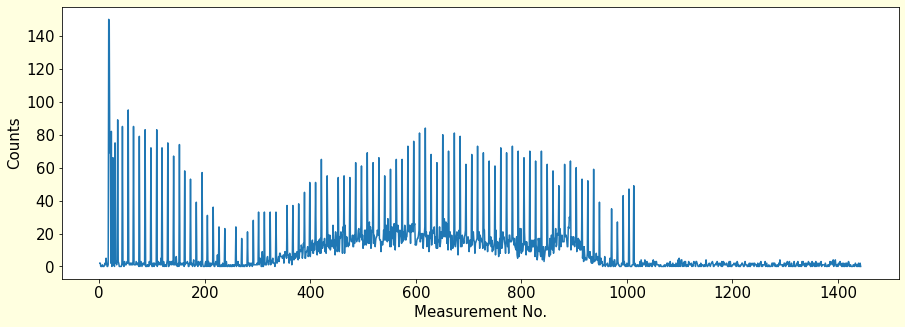

In [186]:
FIRST_CHANNEL = 8

df['sum'] = df.iloc[:,FIRST_CHANNEL:-10].sum(axis=1)

plt.figure(figsize=(15,5), facecolor='lightyellow')
matplotlib.rcParams.update({'font.size': 15})


plt.plot(df['sum'])
plt.xlabel('Measurement No.')
plt.ylabel('Counts')

#plt.ylim(0,100)

(0.0, 70.0)

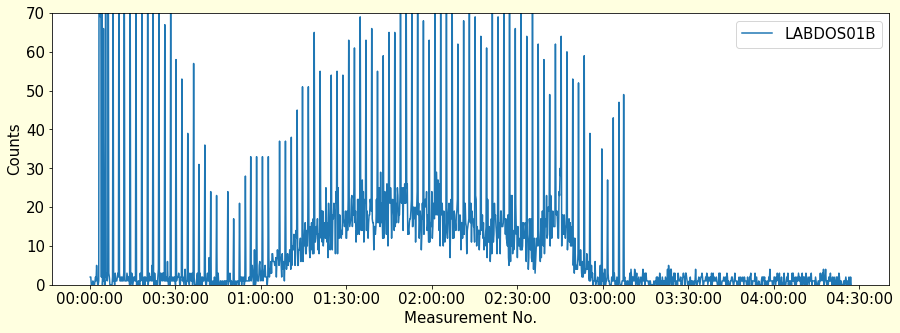

In [169]:
import matplotlib.dates as mdates

FIRST_CHANNEL = 8
df['sum'] = df.iloc[:,FIRST_CHANNEL:-1].sum(axis=1)

plt.figure(figsize=(15,5), facecolor='lightyellow')
matplotlib.rcParams.update({'font.size': 15})

df['time'] = pd.to_datetime(df[2],unit='s')
df.set_index('time', inplace=True)

plt.plot(df['sum'], label='LABDOS01B')
plt.xlabel('Measurement No.')
plt.ylabel('Counts')
dtFmt = mdates.DateFormatter('%T') # define the formatting
plt.gca().xaxis.set_major_formatter(dtFmt) # apply the format to the desired axis
plt.legend()

plt.ylim(0,70)

Text(0, 0.5, 'Counts')

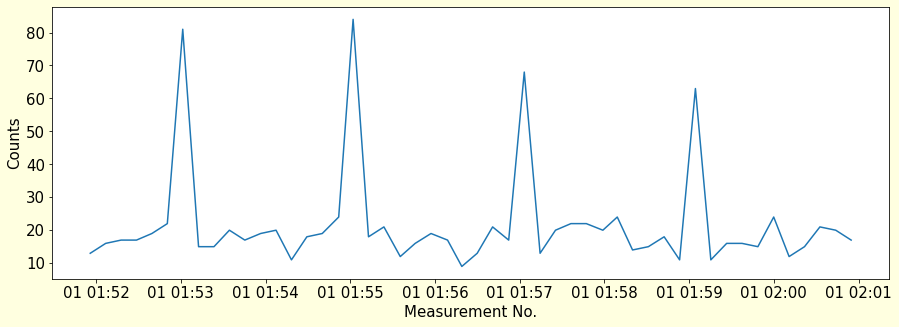

In [170]:
FIRST_CHANNEL = 8
df['sum'] = df.iloc[600:650,FIRST_CHANNEL:-10].sum(axis=1)

plt.figure(figsize=(15,5), facecolor='lightyellow')
matplotlib.rcParams.update({'font.size': 15})

df['time'] = pd.to_datetime(df[2],unit='s')
df.set_index('time', inplace=True)

plt.plot(df['sum'])
plt.xlabel('Measurement No.')
plt.ylabel('Counts')

#plt.ylim(0,100)

In [172]:
fto = '/storage/experiments/2023/12_Fik9/LABDOS01A/2.TXT'

l=[]
l.extend(range(0,505))
df = pd.read_csv(fto, sep=',', header=None, names=l, comment='*', low_memory=False)#,engine='python' )
df = df.reset_index(drop=True)
sn = df.loc[df[0]=='$DOS'].iloc[0,6]
print("S.N.: ", sn)
df = df.loc[df[0]=='$HIST']

S.N.:  1290c00806a200910c56a000a0000020


(0.0, 70.0)

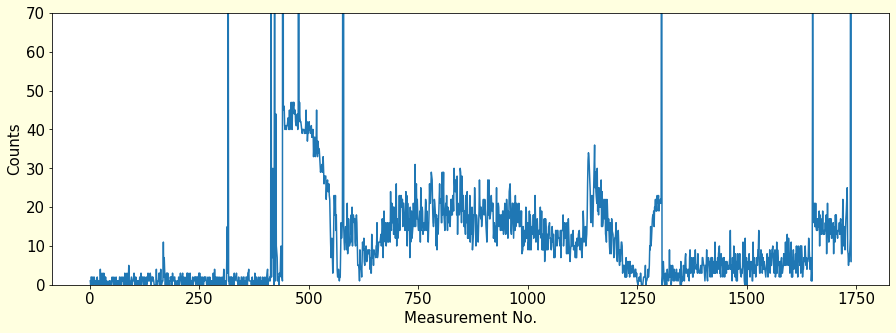

In [173]:
FIRST_CHANNEL = 13
df['sum'] = df.iloc[:,FIRST_CHANNEL:-1].sum(axis=1)

plt.figure(figsize=(15,5), facecolor='lightyellow')
matplotlib.rcParams.update({'font.size': 15})


plt.plot(df['sum'])
plt.xlabel('Measurement No.')
plt.ylabel('Counts')

plt.ylim(0,70)

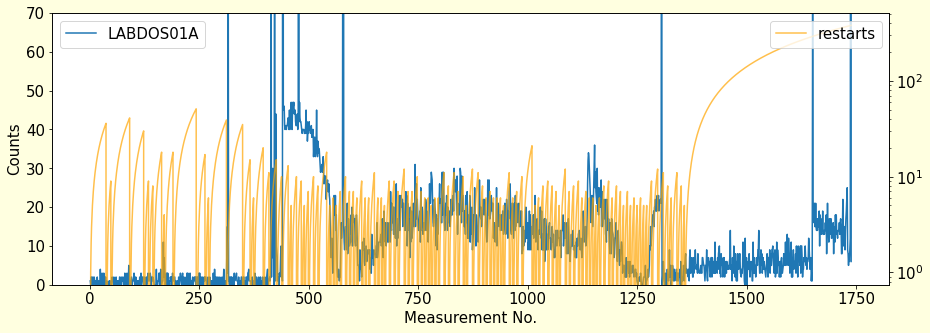

In [184]:
FIRST_CHANNEL = 13
df['sum'] = df.iloc[:,FIRST_CHANNEL:-1].sum(axis=1)

plt.figure(figsize=(15,5), facecolor='lightyellow')
matplotlib.rcParams.update({'font.size': 15})


plt.plot(df['sum'], label='LABDOS01A')
plt.xlabel('Measurement No.')
plt.ylabel('Counts')
plt.legend(loc=2)

plt.ylim(0,70)

plt.twinx()
plt.plot(df[1],color='orange',label='restarts', alpha=0.7)
plt.yscale('log')
plt.legend(loc=1)


## Slegl let do USA

0.045 0.015
0.045 0.015


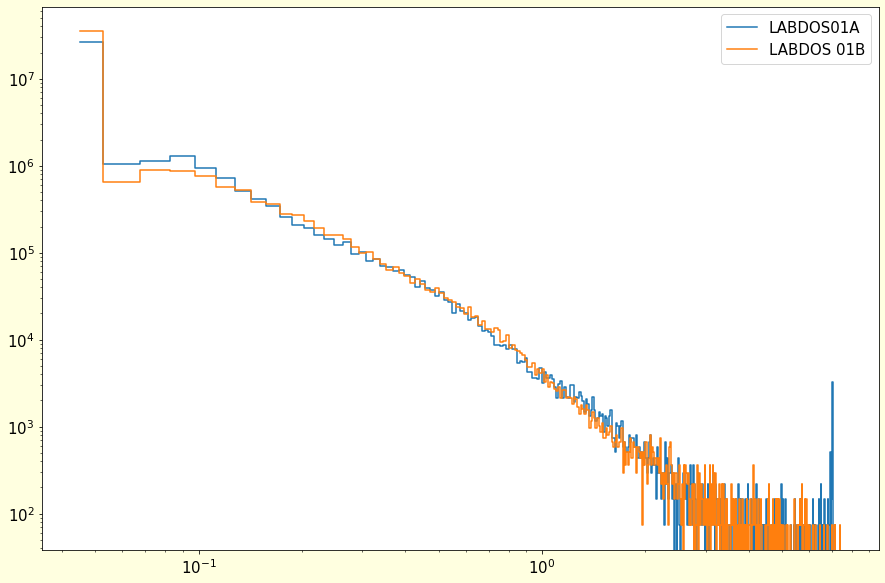

In [235]:
plt.figure(figsize=(15,10), facecolor='lightyellow')
matplotlib.rcParams.update({'font.size': 15})

fto = '/storage/experiments/2023/09_labdos_italy/labdos_B8_230905_0933.txt' #  File to Open
fto = '/storage/experiments/2023/10_labdos_tests/D9/0.TXT' #  Uranove sklo
fto = '/storage/experiments/2023/10_labdos_tests/EF/hangar_oprava/0.TXT'
fto = '/storage/experiments/2023/10_labdos_tests/EF/hangar_oprava/Hangar_ALpaska/2.TXT'
fto = '/storage/experiments/2023/11_labdos_tests/porovnani_2611/LABDOS_20231126_014406.log'
fto = '/storage/experiments/2023/12_USA_LABDOS/flight/LABDOS01A/0.TXT' # Slegl USA

l=[]
l.extend(range(0,530))
df = pd.read_csv(fto, sep=',', header=None, names=l, comment='*', low_memory=False)#,engine='python' )
df = df.reset_index(drop=True)
#sn1 = df.loc[df[0]=='$DOS'].iloc[0,5]
#print("S.N.: ", sn1)
df = df.loc[df[0]=='$HIST']

FIRST_CHANNEL = 8

rcc = df

ener = rcc.iloc[:,FIRST_CHANNEL:500].sum()

coef2 = np.array([0.,0.])
coef2[1] = 0.015
coef2[0] = 0.015*3

print (coef2[0], coef2[1])

e1 = pd.DataFrame()
e1['1'] = ener
e1['i'] = ener.index
e1['x'] = (e1['i'].astype(float)-FIRST_CHANNEL) * coef2[1] + coef2[0]

plt.plot(e1['x'], e1['1'] * 1.1/ coef2[1], label='LABDOS01A', drawstyle='steps-mid')

fto = '/storage/experiments/2023/09_labdos_italy/labdos_EF_230905_0934.txt' #  File to Open
fto = '/storage/experiments/2023/10_labdos_tests/EF/0.TXT' #  Uranove sklo
fto = '/storage/experiments/2023/11_labdos_tests/porovnani_2611/LABDOS_20231126_014748.log'
fto = '/storage/experiments/2023/11_labdos_tests/1_25V_fixed_reference/LABDOS_20231126_143234.log'
fto = '/storage/experiments/2023/12_USA_LABDOS/flight/LABDOS01B/0.TXT' # Slegl USA

l=[]
l.extend(range(0,530))
df = pd.read_csv(fto, sep=',', header=None, names=l, comment='*', low_memory=False)#,engine='python' )
df = df.reset_index(drop=True)
#sn1 = df.loc[df[0]=='$DOS'].iloc[0,5]
#print("S.N.: ", sn1)
df = df.loc[df[0]=='$HIST']

FIRST_CHANNEL = 8

rcc = df

ener = rcc.iloc[:,FIRST_CHANNEL:500].sum()

coef2 = np.array([0.,0.])
coef2[1] = 0.015
coef2[0] = 0.015*3

print (coef2[0], coef2[1])

e2 = pd.DataFrame()
e2['1'] = ener
e2['i'] = ener.index
e2['x'] = (e2['i'].astype(float)-FIRST_CHANNEL) * coef2[1] + coef2[0]

plt.plot(e2['x'], e2['1'] * 1.1/ coef2[1], label='LABDOS 01B', drawstyle='steps-mid')

plt.yscale('log')
plt.xscale('log')
plt.legend()

0.045 0.015
0.045 0.015


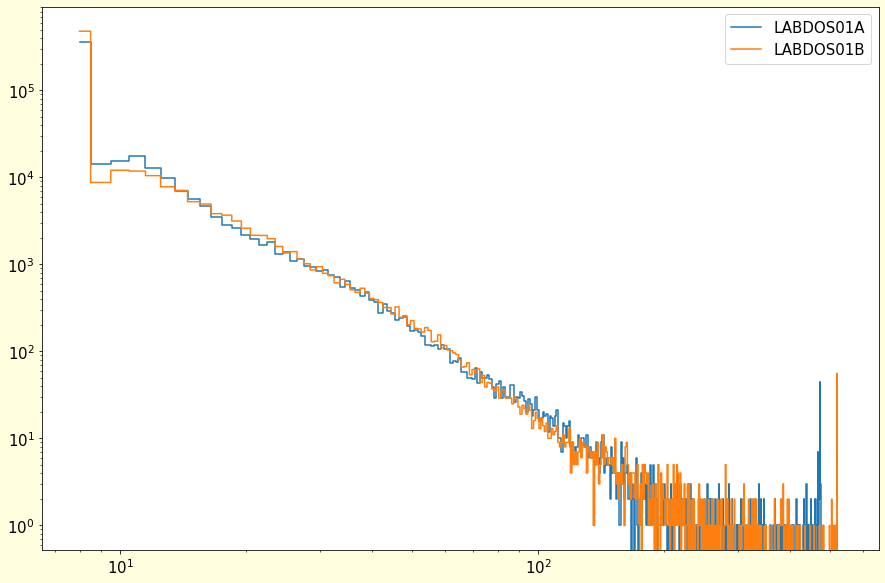

In [247]:
plt.figure(figsize=(15,10), facecolor='lightyellow')
matplotlib.rcParams.update({'font.size': 15})

fto = '/storage/experiments/2023/09_labdos_italy/labdos_B8_230905_0933.txt' #  File to Open
fto = '/storage/experiments/2023/10_labdos_tests/D9/0.TXT' #  Uranove sklo
fto = '/storage/experiments/2023/10_labdos_tests/EF/hangar_oprava/0.TXT'
fto = '/storage/experiments/2023/10_labdos_tests/EF/hangar_oprava/Hangar_ALpaska/2.TXT'
fto = '/storage/experiments/2023/11_labdos_tests/porovnani_2611/LABDOS_20231126_014406.log'
fto = '/storage/experiments/2023/12_USA_LABDOS/flight/LABDOS01A/0.TXT' # Slegl USA

l=[]
l.extend(range(0,530))
df = pd.read_csv(fto, sep=',', header=None, names=l, comment='*', low_memory=False)#,engine='python' )
df = df.reset_index(drop=True)
#sn1 = df.loc[df[0]=='$DOS'].iloc[0,5]
#print("S.N.: ", sn1)
df = df.loc[df[0]=='$HIST']

FIRST_CHANNEL = 8

rcc = df

ener = rcc.iloc[:,FIRST_CHANNEL:500].sum()

coef2 = np.array([0.,0.])
coef2[1] = 0.015
coef2[0] = 0.015*3

print (coef2[0], coef2[1])

e1 = pd.DataFrame()
e1['1'] = ener
e1['i'] = ener.index
e1['x'] = (e1['i'].astype(float)-FIRST_CHANNEL) * coef2[1] + coef2[0]

plt.plot( e1['1'] , label='LABDOS01A', drawstyle='steps-mid')

fto = '/storage/experiments/2023/09_labdos_italy/labdos_EF_230905_0934.txt' #  File to Open
fto = '/storage/experiments/2023/10_labdos_tests/EF/0.TXT' #  Uranove sklo
fto = '/storage/experiments/2023/11_labdos_tests/porovnani_2611/LABDOS_20231126_014748.log'
fto = '/storage/experiments/2023/11_labdos_tests/1_25V_fixed_reference/LABDOS_20231126_143234.log'
fto = '/storage/experiments/2023/12_USA_LABDOS/flight/LABDOS01B/0.TXT' # Slegl USA

l=[]
l.extend(range(0,530))
df = pd.read_csv(fto, sep=',', header=None, names=l, comment='*', low_memory=False)#,engine='python' )
df = df.reset_index(drop=True)
#sn1 = df.loc[df[0]=='$DOS'].iloc[0,5]
#print("S.N.: ", sn1)
df = df.loc[df[0]=='$HIST']

FIRST_CHANNEL = 8

rcc = df

ener = rcc.iloc[:,FIRST_CHANNEL:530].sum()

coef2 = np.array([0.,0.])
coef2[1] = 0.015
coef2[0] = 0.015*3

print (coef2[0], coef2[1])

e2 = pd.DataFrame()
e2['1'] = ener
e2['i'] = ener.index
e2['x'] = (e2['i'].astype(float)-FIRST_CHANNEL) * coef2[1] + coef2[0]

plt.plot( e2['1'], label='LABDOS01B', drawstyle='steps-mid')

plt.yscale('log')
plt.xscale('log')
plt.legend()

In [214]:
fto = '/storage/experiments/2023/12_USA_LABDOS/flight/LABDOS01A/0.TXT' # Slegl USA

l=[]
l.extend(range(0,505))
df = pd.read_csv(fto, sep=',', header=None, names=l, comment='*', low_memory=False)#,engine='python' )
df = df.reset_index(drop=True)
sn = df.loc[df[0]=='$DOS'].iloc[0,6]
print("S.N.: ", sn)
df = df.loc[df[0]=='$HIST']

S.N.:  1290c00806a200913c56a000a00000d9


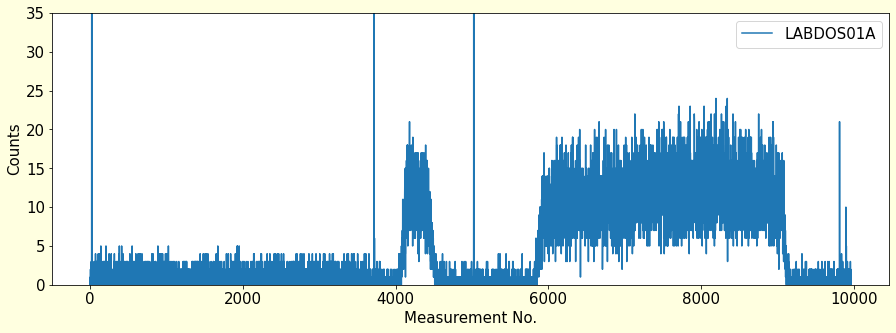

In [219]:
FIRST_CHANNEL = 13
df['sum'] = df.iloc[:,FIRST_CHANNEL:-1].sum(axis=1)

plt.figure(figsize=(15,5), facecolor='lightyellow')
matplotlib.rcParams.update({'font.size': 15})


plt.plot(df['sum'], label=fto.split('/')[-2])
plt.xlabel('Measurement No.')
plt.ylabel('Counts')

plt.ylim(0,35)
plt.legend()

In [221]:
fto = '/storage/experiments/2023/12_USA_LABDOS/flight/LABDOS01B/0.TXT' # Slegl USA

l=[]
l.extend(range(0,520))
df = pd.read_csv(fto, sep=',', header=None, names=l, comment='*', low_memory=False)#,engine='python' )
df = df.reset_index(drop=True)
sn = df.loc[df[0]=='$DOS'].iloc[0,6]
print("S.N.: ", sn)
df = df.loc[df[0]=='$HIST']

S.N.:  1290c00806a200905013a000a0000067


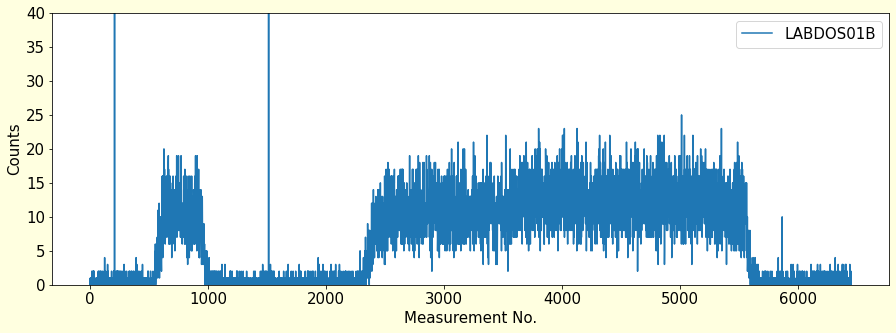

In [233]:
FIRST_CHANNEL = 13
df['sum'] = df.iloc[:,FIRST_CHANNEL:-1].sum(axis=1)

plt.figure(figsize=(15,5), facecolor='lightyellow')
matplotlib.rcParams.update({'font.size': 15})


plt.plot(df['sum'], label=fto.split('/')[-2])
plt.xlabel('Measurement No.')
plt.ylabel('Counts')

plt.ylim(0,40)
plt.legend()